# Import Required Libraries
Import libraries such as TensorFlow, Keras, NumPy, Matplotlib, and others required for deep learning and visualization.

In [1]:
# Import necessary libraries for deep learning and visualization
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow import keras  # Keras for building neural networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
import numpy as np  # NumPy for numerical computations
import matplotlib.pyplot as plt  # Matplotlib for visualization
import os  # OS module for file and directory operations

# Load and Explore Dataset
Load the butterfly dataset and explore its structure, including the number of classes and sample images.

In [3]:
import os
import shutil
import pandas as pd

# Read the CSV file
csv_file_path = "C:/Users/admin/Downloads/DL_Assignment2/Training_set.csv"
data = pd.read_csv(csv_file_path)

# Creating train and validation directories

root_directory = "C:/Users/admin/Downloads/DL_Assignment2"

image_dir = "C:/Users/admin/Downloads/DL_Assignment2/train"

train_directory = os.path.join(root_directory, "train")
val_directory = os.path.join(root_directory, "validation")

# Create directories for train and validation
os.makedirs(train_directory, exist_ok=True)
os.makedirs(val_directory, exist_ok=True)

labels = data["label"].value_counts().index

for label in labels:
    label_train_directory = os.path.join(train_directory, label)
    label_val_directory = os.path.join(val_directory, label)
    os.makedirs(label_train_directory, exist_ok=True)
    os.makedirs(label_val_directory, exist_ok=True)

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

# Split the data into 70% train and 30% validation
val_data_count = int(len(data) * 0.3)
validation_data = data[:val_data_count]
train_data = data[val_data_count:]

# Copy train data
for index, row in train_data.iterrows():
    file_name = row['filename']
    label = row['label']
    source_path = os.path.join(image_dir, file_name)
    destination_directory = os.path.join(train_directory, label)
    shutil.copy(source_path, destination_directory)

# Copy validation data
for index, row in validation_data.iterrows():
    file_name = row['filename']
    label = row['label']
    source_path = os.path.join(image_dir, file_name)
    destination_directory = os.path.join(val_directory, label)
    shutil.copy(source_path, destination_directory)


# Data Preprocessing
Resize images to a fixed size, normalize pixel values to [0, 1], and apply data augmentation techniques such as rotation, flipping, and zooming.

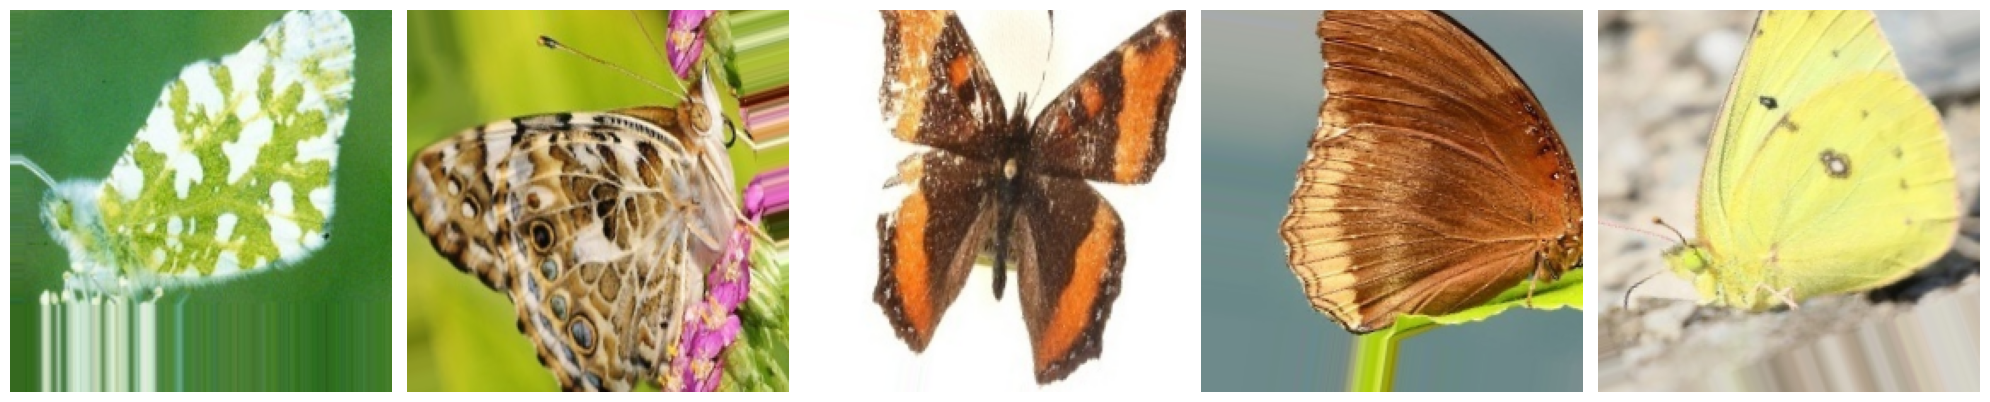

In [8]:
# Data Preprocessing

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Define image size and batch size
image_size = (224, 224)  # Resize images to 224x224
batch_size = 32

# Load the dataset from the CSV file
dataset_file = r'C:\Users\admin\Downloads\DL_Assignment2\Training_set.csv'
data = pd.read_csv(dataset_file)

# Define the path to the directory containing the images
image_dir = r'C:\Users\admin\Downloads\DL_Assignment2\train'

# Create an ImageDataGenerator for data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,  # Apply random shearing transformations
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# Load and preprocess the images and labels
images = []
labels = []

for _, row in data.iterrows():
    img_path = os.path.join(image_dir, row['filename'])
    if os.path.exists(img_path):  # Ensure the image file exists
        img = load_img(img_path, target_size=image_size)  # Load and resize the image
        img_array = img_to_array(img)  # Convert the image to a NumPy array
        images.append(img_array)
        labels.append(row['label'])

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = pd.get_dummies(labels).values  # One-hot encode the labels

# Apply data augmentation
train_generator = datagen.flow(
    images, labels, batch_size=batch_size
)

# Visualize a few augmented images
sample_batch, _ = next(train_generator)  # Get a batch of images and labels
fig, axes = plt.subplots(1, 5, figsize=(20, 10))  # Display 5 augmented images
for i in range(5):
    axes[i].imshow(sample_batch[i])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [4]:
#directories
training_dir="C:/Users/admin/Downloads/DL_Assignment2/train"
validation_dir="C:/Users/admin/Downloads/DL_Assignment2/test"

# Model Development
Use a pre-trained model like MobileNet or ResNet for feature extraction, and fine-tune it or build a custom CNN architecture for classification.

In [ ]:
# Model 2: Custom CNN
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 224 -> 112
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 112 -> 56
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)   # 56 -> 28
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [4]:
# Load a pre-trained model (MobileNetV2) for feature extraction
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
import pandas as pd

# Load the dataset from the CSV file
dataset_file = r'C:\Users\SHASANK PANDEY\Downloads\Assign2\Training_set.csv'
data = pd.read_csv(dataset_file)

# Extract the unique classes from the dataset
classes = data['label'].unique()

# Load the MobileNetV2 model with pre-trained ImageNet weights, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained features
base_model.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling instead of flattening
x = Dense(256, activation='relu')(x)  # Fully connected layer with 256 units
x = Dropout(0.5)(x)  # Dropout for regularization
output_layer = Dense(len(classes), activation='softmax')(x)  # Output layer with softmax activation

# Create the final model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model with appropriate loss function and optimizer
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Evaluation metric
)

# Display the model architecture
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,605,195 (9.94 MB)

 Trainable params: 347,211 (1.32 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

# Training and Evaluation
Train the model using appropriate loss functions and optimizers. Evaluate the model using metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
# Train the model
history = model.fit(
    train_generator,  # Training data generator
    epochs=10,  # Number of epochs
    verbose=1  # Display training progress
)

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")






c:\Users\SHASANK PANDEY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.1438 - loss: 3.7517
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 485s 2s/step - accuracy: 0.5552 - loss: 1.6782
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 478s 2s/step - accuracy: 0.6598 - loss: 1.2218
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.7126 - loss: 1.0169
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 466s 2s/step - accuracy: 0.7422 - loss: 0.8720
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.7554 - loss: 0.8484
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.7780 - loss: 0.7571
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.7768 - loss: 0.7395
Epoch 9/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.8040 - loss: 0.6279
Epoch 10/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.8112 - loss: 0.6303
204/204 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9103 - loss: 0.3156
Training Loss: 0.3304763734340668
Training Accuracy: 

ModuleNotFoundError: No module named 'sklearn'

204/204 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step
Classification Report:
                           precision    recall  f1-score   support

         SOUTHERN DOGFACE       0.01      0.01      0.01        88
                   ADONIS       0.01      0.01      0.01        75
           BROWN SIPROETA       0.00      0.00      0.00        74
                  MONARCH       0.01      0.01      0.01        85
 GREEN CELLED CATTLEHEART       0.01      0.01      0.01        90
          CAIRNS BIRDWING       0.02      0.02      0.02       100
     EASTERN DAPPLE WHITE       0.03      0.03      0.03        97
              RED POSTMAN       0.01      0.01      0.01        83
         MANGROVE SKIPPER       0.01      0.01      0.01        81
         BLACK HAIRSTREAK       0.02      0.02      0.02        85
            CABBAGE WHITE       0.01      0.01      0.01        75
              RED ADMIRAL       0.03      0.02      0.02        86
             PAINTED LADY       0.01      0.01      0.01       

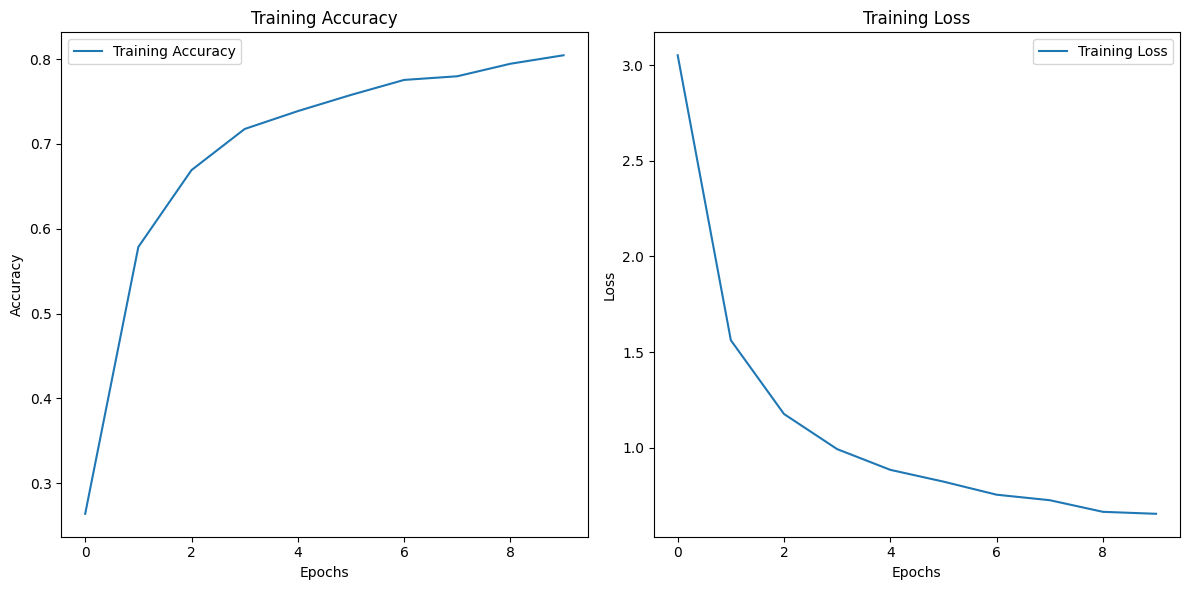

In [ ]:
# Import necessary libraries for evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Generate predictions for the training data
train_generator.reset()  # Reset the generator to start from the beginning
predictions = model.predict(train_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted class indices

# Get the true class indices and class labels
true_classes = np.argmax(labels, axis=1)  # True labels from the one-hot encoded array
class_labels = list(data['label'].unique())  # Get the class labels from the dataset

# Generate a classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

# Plot training accuracy and loss curves
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()